# Introduction

The exam is taken by Siarhei Bahdanik (s.bahdanik@jacobs-university.de)
The purpose of the exam is to analyse the provided data and to resolve the general task of the exam.
The dataset provides information about taxi drives in New York City.
The general task of the exam is to build a predictive model for the target variable GoodTip from the dataset.

Let's load the dataset and see the actual rows.

In [105]:
import pandas as pd

df_raw = pd.read_csv("./exam_data.csv", index_col=0, parse_dates=[2, 3])

df_raw[:10]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
1,2,2016-02-01 00:01:00,2016-02-01 00:16:35,1,8.23,-73.872993,40.774059,1,N,-73.977333,...,24.0,0.5,0.5,0.00,5.54,0.3,30.84,False,True,True
2,1,2016-02-19 20:49:52,2016-02-19 21:06:03,2,4.50,-73.989021,40.691963,1,N,-73.952850,...,16.5,0.5,0.5,0.00,0.00,0.3,17.80,False,True,False
3,2,2016-02-19 20:50:34,2016-02-19 21:01:13,6,1.79,-73.966812,40.757511,1,N,-73.982834,...,9.0,0.5,0.5,2.06,0.00,0.3,12.36,True,True,False
4,1,2016-02-19 20:53:20,2016-02-19 21:04:18,1,0.70,0.000000,0.000000,1,N,0.000000,...,8.0,0.5,0.5,1.00,0.00,0.3,10.30,False,True,False
5,2,2016-02-19 20:53:58,2016-02-19 21:05:31,2,1.95,-74.006340,40.733898,1,N,-73.988312,...,9.5,0.5,0.5,0.00,0.00,0.3,10.80,False,True,True
6,1,2016-02-19 20:54:38,2016-02-19 21:07:51,1,2.80,-73.966164,40.764820,1,N,-73.960670,...,12.0,0.5,0.5,0.00,0.00,0.3,13.30,False,True,True
7,2,2016-02-19 20:54:41,2016-02-19 21:06:27,1,1.17,-73.990387,40.741909,1,N,-73.984947,...,8.5,0.5,0.5,1.96,0.00,0.3,11.76,True,True,False
8,1,2016-02-19 20:56:37,2016-02-19 21:21:59,1,5.40,-73.988220,40.748104,1,N,-73.957237,...,21.5,0.5,0.5,4.55,0.00,0.3,27.35,True,True,False
9,1,2016-02-19 20:57:02,2016-02-19 21:12:09,1,2.40,-73.964081,40.754578,1,N,-73.987488,...,11.5,0.5,0.5,1.00,0.00,0.3,13.80,False,True,False
10,2,2016-02-19 20:59:24,2016-02-19 21:12:14,2,1.73,-73.989662,40.730129,1,N,-73.980530,...,10.0,0.5,0.5,1.50,0.00,0.3,12.80,False,True,False


The dataset has no duplicates

In [106]:
df_raw.duplicated().sum()

0

Let's have a brief look at the dataset

In [107]:
df_raw.nunique()

VendorID                     2
tpep_pickup_datetime     28274
tpep_dropoff_datetime    28258
passenger_count              7
trip_distance             1606
pickup_longitude          9240
pickup_latitude          15454
RatecodeID                   7
store_and_fwd_flag           2
dropoff_longitude        10225
dropoff_latitude         16747
payment_type                 4
fare_amount                188
extra                        6
mta_tax                      3
tip_amount                 690
tolls_amount                32
improvement_surcharge        3
total_amount              1297
GoodTip                      2
Extra                        2
Cash                         2
dtype: int64

In [108]:
df_raw.describe(include='all', datetime_is_numeric=True)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
count,28454.000000,28454,28454,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454,28454.000000,...,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454,28454,28454
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28304,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17436,14820,19337
mean,1.533774,2016-02-15 16:19:16.619491072,2016-02-15 16:34:15.093800704,1.655795,2.852075,-72.829426,40.119622,1.042419,NaN,-72.857715,...,12.412521,0.329901,0.497680,1.765338,0.286711,0.299810,15.591933,NaN,NaN,NaN
min,1.000000,2016-02-01 00:01:00,2016-02-01 00:16:35,0.000000,0.000000,-121.933228,0.000000,1.000000,NaN,-121.933289,...,-9.500000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-10.300000,NaN,NaN,NaN
25%,1.000000,2016-02-08 13:24:34.249999872,2016-02-08 13:42:16.249999872,1.000000,1.000000,-73.991623,40.736851,1.000000,NaN,-73.991196,...,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000,NaN,NaN,NaN
50%,2.000000,2016-02-15 15:34:19.500000,2016-02-15 15:44:52.500000,1.000000,1.690000,-73.981564,40.753399,1.000000,NaN,-73.979820,...,9.000000,0.000000,0.500000,1.350000,0.000000,0.300000,11.750000,NaN,NaN,NaN
75%,2.000000,2016-02-22 20:22:59.750000128,2016-02-22 20:33:15,2.000000,3.090000,-73.966850,40.767852,1.000000,NaN,-73.962173,...,14.000000,0.500000,0.500000,2.350000,0.000000,0.300000,17.250000,NaN,NaN,NaN
max,2.000000,2016-02-29 23:54:53,2016-03-01 00:22:49,6.000000,47.180000,0.000000,41.107109,99.000000,NaN,0.000000,...,275.000000,4.500000,0.500000,140.000000,24.500000,0.300000,275.300000,NaN,NaN,NaN


In [109]:
df_raw.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
GoodTip                            bool
Extra                              bool
Cash                               bool
dtype: object

In [110]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28454 entries, 1 to 28454
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               28454 non-null  int64         
 1   tpep_pickup_datetime   28454 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  28454 non-null  datetime64[ns]
 3   passenger_count        28454 non-null  int64         
 4   trip_distance          28454 non-null  float64       
 5   pickup_longitude       28454 non-null  float64       
 6   pickup_latitude        28454 non-null  float64       
 7   RatecodeID             28454 non-null  int64         
 8   store_and_fwd_flag     28454 non-null  object        
 9   dropoff_longitude      28454 non-null  float64       
 10  dropoff_latitude       28454 non-null  float64       
 11  payment_type           28454 non-null  int64         
 12  fare_amount            28454 non-null  float64       
 13  e

We may see that it has no null values. That is good. But it doesn't match with the features explanation from the task statement. Let's write down what we have already noticed in the dataset.

From the description of the raw data we may see several facts which can help to improve the quality of this dataset:

1. `VendorID` is an integer constant either `1` or `2`. We can replace it with a string label or a boolean value in the future. This allows not to confuse the linear regression model with an unnecessary integer.
2. `tpep_pickup_datetime` and `tpep_dropoff_datetime` all belong to the same month and year. Therefor we can extract from these columns only the day of a week and the hour. It's better not to include the day of a month in the list of features because there is only one month in this data, and it may lead to the bias in a trained model.
3. `passenger_count` and `trip_distance` start form `0` which looks incorrect according to the data description. These columns should be sanitized.
4. `pickup_longitude`, `pickup_latitude`, `dropoff_longitude`, and `dropoff_latitude` contain some unreasonable outlets and should be sanitized too.
5. `RatecodeID` should have 6 different values according to the description. While in fact it has integer value from `1` to `99`. It should be explored, replaced with string labels and maybe sanitized.
6. `store_and_fwd_flag` is a string while it should be a boolean.
7. `payment_type` is an integer from `1` to `4` while it should be an enum with `6` different values.
8. `fare_amount`, `extra`, `mta_tax`, `improvement_surcharge` and `total_amount` can be negative. It's strange that a taxi drive has a negative price therefor it's better to exclude such records from the dataset.

Based on the observations above let's sanitize and transform the data in order to proceed with data exploration.

# Data sanitizing

Let's start looking for unwanted rows which will be removed later.

In [111]:
df_raw.RatecodeID.value_counts()

1     27776
2       528
5        86
3        49
4        12
99        2
6         1
Name: RatecodeID, dtype: int64

As we may see `RatecodeID` column has extra value `99` which should be sanitized.

In [112]:
df_raw.payment_type.value_counts()

1    19183
2     9117
3      106
4       48
Name: payment_type, dtype: int64

Let's remove upper and lower percentiles of locations in order to get rid of outliers.

In [113]:
def range_func(pickup, dropoff, start=0.01, end=0.99):
    coordinates = pd.concat([pickup, dropoff])
    return (coordinates.quantile(start), coordinates.quantile(end))

latitude_range = range_func(df_raw.pickup_latitude, df_raw.dropoff_latitude, start=0.02)
print(latitude_range)
longitude_range = range_func(df_raw.pickup_longitude, df_raw.dropoff_longitude, end=0.98)
print(longitude_range)

(40.64374214172362, 40.8196868896484)
(-74.0143966674805, -73.78188430786132)


In [114]:
trip_distance = (df_raw.trip_distance.quantile(.01), df_raw.trip_distance.quantile(.99))
trip_distance

(0.2, 18.4)

Starting sanitizing

In [115]:
filters = {
    'zero_passengers': lambda df: df.passenger_count != 0,
    'distance_1': lambda df: df.trip_distance > trip_distance[0],
    'distance_2': lambda df: df.trip_distance < trip_distance[1],
    'ratecode': lambda df: df.RatecodeID != 99,
    'positive_fare_amount': lambda df: df.fare_amount > 0,
    'constant_mta_tax': lambda df: df.mta_tax == 0.5,
    'constant_improvement_surcharge': lambda df: df.improvement_surcharge == 0.3,
    'nonegative_extra': lambda df: df.extra >= 0,
    'positive_total_amount': lambda df: df.total_amount > 0,
    'latitude_pickup_1': lambda df: latitude_range[0] < df.pickup_latitude,
    'latitude_pickup_2': lambda df: df.pickup_latitude < latitude_range[1],
    'longitude_pickup_1': lambda df: longitude_range[0] < df.pickup_longitude,
    'longitude_pickup_2': lambda df: df.pickup_longitude < longitude_range[1],
    'latitude_dropoff_1': lambda df: latitude_range[0] < df.dropoff_latitude,
    'latitude_dropoff_2': lambda df: df.dropoff_latitude < latitude_range[1],
    'longitude_dropoff_1': lambda df: longitude_range[0] < df.dropoff_longitude,
    'longitude_dropoff_2': lambda df: df.dropoff_longitude < longitude_range[1],
    }

df_sanitized = df_raw
for name, func in filters.items():
    print(f'{name}: {df_raw.shape[0] - df_raw.loc[func].shape[0]}')
    df_sanitized = df_sanitized.loc[func]

zero_passengers: 3
distance_1: 340
distance_2: 293
ratecode: 2
positive_fare_amount: 17
constant_mta_tax: 126
constant_improvement_surcharge: 12
nonegative_extra: 4
positive_total_amount: 9
latitude_pickup_1: 523
latitude_pickup_2: 85
longitude_pickup_1: 237
longitude_pickup_2: 615
latitude_dropoff_1: 616
latitude_dropoff_2: 486
longitude_dropoff_1: 334
longitude_dropoff_2: 524


In [116]:
df_sanitized.describe(include='all', datetime_is_numeric=True)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
count,26084.000000,26084,26084,26084.000000,26084.000000,26084.000000,26084.000000,26084.000000,26084,26084.000000,...,26084.000000,26084.000000,26084.0,26084.000000,26084.000000,2.608400e+04,26084.000000,26084,26084,26084
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25960,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16138,13507,17824
mean,1.538184,2016-02-15 16:10:03.333959424,2016-02-15 16:24:19.626131200,1.658296,2.453902,-73.976477,40.752798,1.007054,NaN,-73.975435,...,11.211221,0.326771,0.5,1.633761,0.201673,3.000000e-01,14.173427,NaN,NaN,NaN
min,1.000000,2016-02-01 00:01:00,2016-02-01 00:16:35,1.000000,0.210000,-74.014389,40.643745,1.000000,NaN,-74.014359,...,2.500000,0.000000,0.5,0.000000,0.000000,3.000000e-01,3.300000,NaN,NaN,NaN
25%,1.000000,2016-02-08 13:24:36.750000128,2016-02-08 13:42:22.750000128,1.000000,1.000000,-73.991631,40.739327,1.000000,NaN,-73.991167,...,6.500000,0.000000,0.5,0.000000,0.000000,3.000000e-01,8.300000,NaN,NaN,NaN
50%,2.000000,2016-02-15 15:27:47,2016-02-15 15:34:05,1.000000,1.600000,-73.981915,40.754700,1.000000,NaN,-73.980362,...,9.000000,0.000000,0.5,1.350000,0.000000,3.000000e-01,11.300000,NaN,NaN,NaN
75%,2.000000,2016-02-22 19:57:41.750000128,2016-02-22 20:10:35.500000,2.000000,2.800000,-73.968773,40.768234,1.000000,NaN,-73.965033,...,13.000000,0.500000,0.5,2.260000,0.000000,3.000000e-01,16.300000,NaN,NaN,NaN
max,2.000000,2016-02-29 23:54:53,2016-03-01 00:11:41,6.000000,18.370000,-73.781891,40.819660,2.000000,NaN,-73.781898,...,58.500000,4.500000,0.5,44.200000,18.040000,3.000000e-01,81.690000,NaN,NaN,NaN


Now the data is sanitized and there are only 26084 records left. Majority of records were removed because of too short or too long distance and incorrect pickup or dropoff location.

Now let's transform the data into a more explorable dataset.

In [117]:
df_data = df_sanitized

replace_dict = {k:v for k,v in enumerate(['mon','tue','wed','thu','fri','sat', 'sun'])}
weekday_func = lambda x: x.weekday()

pickup_weekdays = df_data.tpep_pickup_datetime.map(weekday_func).replace(replace_dict)
dropoff_weekdays = df_data.tpep_dropoff_datetime.map(weekday_func).replace(replace_dict)

df_data['pickup_weekday'] = pickup_weekdays
df_data['dropoff_weekday'] = dropoff_weekdays

df_data.loc[(df_data.pickup_weekday != df_data.dropoff_weekday)].shape

(234, 24)

There are only 234 records when pickup day and dropoff day are different. We can ignore it and leave only one day in the dataset.

In [118]:
hour_func = lambda x: x.hour

df_data['pickup_hour'] = df_data.tpep_pickup_datetime.map(hour_func)
df_data['dropoff_hour'] = df_data.tpep_dropoff_datetime.map(hour_func)


df_data.loc[(df_data.pickup_hour != df_data.dropoff_hour)].shape

(5476, 26)

Again almost always the pickup hour and dropoff hour is the same. We can leave only one column in the dataset.

In [119]:
df_data['VendorID'] = df_data.VendorID.replace({1:True, 2:False})
df_data['store_and_fwd_flag'] = df_data.store_and_fwd_flag.replace({'Y':True, 'N':False})

Now let's split the whole map in a finite number of regions and instead of geolocation lets use the region location.

In [120]:
latitude_range = range_func(df_data.pickup_latitude, df_data.dropoff_latitude, start=0, end=1)
print(latitude_range)
longitude_range = range_func(df_data.pickup_longitude, df_data.dropoff_longitude, start=0, end=1)
print(longitude_range)

def latitude_func(latitude, region_count):
    latitude_devisor = (latitude_range[1] - latitude_range[0]) / (region_count - 1)
    return round((latitude - latitude_range[0]) / latitude_devisor)

def longitude_func(longitude, region_count):
    longitude_devisor = (longitude_range[1] - longitude_range[0]) / (region_count - 1)
    return round((longitude - longitude_range[0]) / longitude_devisor)

def regions_func(locations, regions):
    latitudes = locations.apply(
        lambda r: latitude_func(r.latitude, regions[0]),
        axis=1
    )
    longitudes = locations.apply(
        lambda r: longitude_func(r.longitude, regions[1]),
        axis=1
    )
    return pd.concat([latitudes, longitudes], axis=1, keys=['X', 'Y'])

pickup_location = df_data[['pickup_latitude', 'pickup_longitude']].rename(
    columns={'pickup_latitude':'latitude', 'pickup_longitude': 'longitude'}
)
dropoff_location = df_data[['dropoff_latitude', 'dropoff_longitude']].rename(
    columns={'dropoff_latitude':'latitude', 'dropoff_longitude': 'longitude'}
)

(40.6437454223633, 40.8196601867676)
(-74.0143890380859, -73.7818908691406)


Now let's visualize the distribution of regions

<AxesSubplot:xlabel='Y', ylabel='X'>

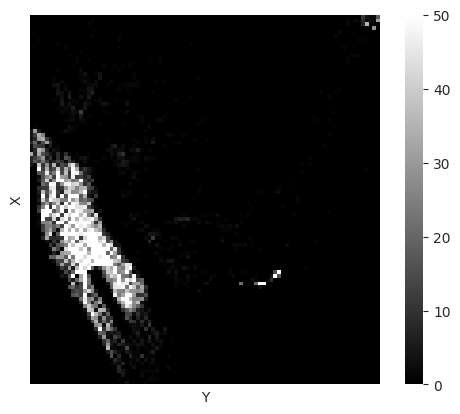

In [121]:
import seaborn as sb

pickup_regions = regions_func(pickup_location, (100, 100))

sb.heatmap(pickup_regions.groupby(['X', 'Y']).size().unstack().fillna(0), xticklabels=False, yticklabels=False, cmap="gray", vmax=50, vmin=0, square=True, cbar=True)

<AxesSubplot:xlabel='Y', ylabel='X'>

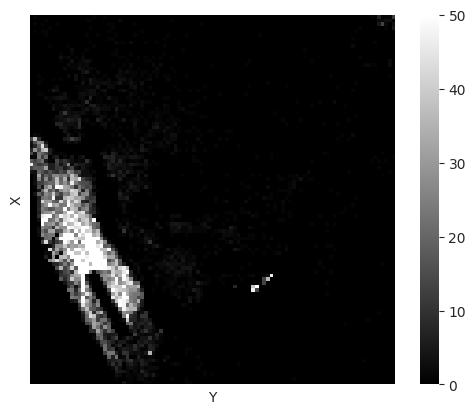

In [122]:
dropoff_regions = regions_func(dropoff_location, (100, 100))

sb.heatmap(dropoff_regions.groupby(['X', 'Y']).size().unstack().fillna(0), xticklabels=False, yticklabels=False, cmap="gray", vmax=50, vmin=0, square=True, cbar=True)

<AxesSubplot:xlabel='Y', ylabel='X'>

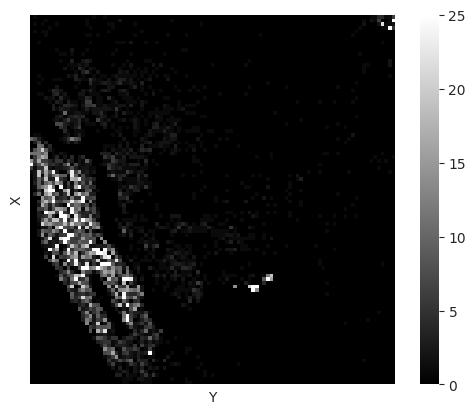

In [123]:
diff_regions = abs(dropoff_regions.groupby(['X', 'Y']).size().unstack().fillna(0) - pickup_regions.groupby(['X', 'Y']).size().unstack().fillna(0)).fillna(0)

sb.heatmap(diff_regions, xticklabels=False, yticklabels=False, cmap="gray", vmax=25, vmin=0, square=True, cbar=True)

Now we can see that almost all drives are picked up and dropped off approximately in the same region. Nevertheless, the difference between 2 heatmaps is noticeable and can't be neglected.

Let's now create a final dataset with new columns added and unnecessary columns removed.

In [124]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26084 entries, 1 to 28454
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               26084 non-null  bool          
 1   tpep_pickup_datetime   26084 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  26084 non-null  datetime64[ns]
 3   passenger_count        26084 non-null  int64         
 4   trip_distance          26084 non-null  float64       
 5   pickup_longitude       26084 non-null  float64       
 6   pickup_latitude        26084 non-null  float64       
 7   RatecodeID             26084 non-null  int64         
 8   store_and_fwd_flag     26084 non-null  bool          
 9   dropoff_longitude      26084 non-null  float64       
 10  dropoff_latitude       26084 non-null  float64       
 11  payment_type           26084 non-null  int64         
 12  fare_amount            26084 non-null  float64       
 13  e

In [125]:
df_data = df_data.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'mta_tax', 'improvement_surcharge', 'dropoff_hour', 'dropoff_weekday'])
df_data['pickup_x'] = pickup_regions['X']
df_data['pickup_y'] = pickup_regions['Y']
df_data['dropoff_x'] = dropoff_regions['X']
df_data['dropoff_y'] = dropoff_regions['Y']
df_data.describe(include='all')

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,GoodTip,Extra,Cash,pickup_weekday,pickup_hour,pickup_x,pickup_y,dropoff_x,dropoff_y
count,26084,26084.000000,26084.000000,26084.000000,26084,26084.000000,26084.000000,26084.000000,26084.000000,26084.000000,26084.000000,26084,26084,26084,26084,26084.000000,26084.000000,26084.000000,26084.000000,26084.000000
unique,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,7,NaN,NaN,NaN,NaN,NaN
top,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,fri,NaN,NaN,NaN,NaN,NaN
freq,14038,NaN,NaN,NaN,25960,NaN,NaN,NaN,NaN,NaN,NaN,16138,13507,17824,4113,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.658296,2.453902,1.007054,NaN,1.324605,11.211221,0.326771,1.633761,0.201673,14.173427,NaN,NaN,NaN,NaN,13.746013,61.368080,16.147370,61.074950,16.586451
std,NaN,1.317942,2.567947,0.083694,NaN,0.480122,7.650964,0.402019,1.924148,1.046221,9.604070,NaN,NaN,NaN,NaN,6.255522,13.177269,12.305052,14.802873,11.549533
min,NaN,1.000000,0.210000,1.000000,NaN,1.000000,2.500000,0.000000,0.000000,0.000000,3.300000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,1.000000,1.000000,NaN,1.000000,6.500000,0.000000,0.000000,0.000000,8.300000,NaN,NaN,NaN,NaN,9.000000,54.000000,10.000000,53.000000,10.000000
50%,NaN,1.000000,1.600000,1.000000,NaN,1.000000,9.000000,0.000000,1.350000,0.000000,11.300000,NaN,NaN,NaN,NaN,14.000000,62.000000,14.000000,62.000000,14.000000
75%,NaN,2.000000,2.800000,1.000000,NaN,2.000000,13.000000,0.500000,2.260000,0.000000,16.300000,NaN,NaN,NaN,NaN,19.000000,70.000000,19.000000,71.000000,21.000000


By this moment the dataset is transformed into a more meaningful format and can be explored

# Data exploration

Let's start with `VendorID` column. We have to explore the vendor's distribution and its' impact on the `GoodTip` value.

<AxesSubplot:ylabel='VendorID'>

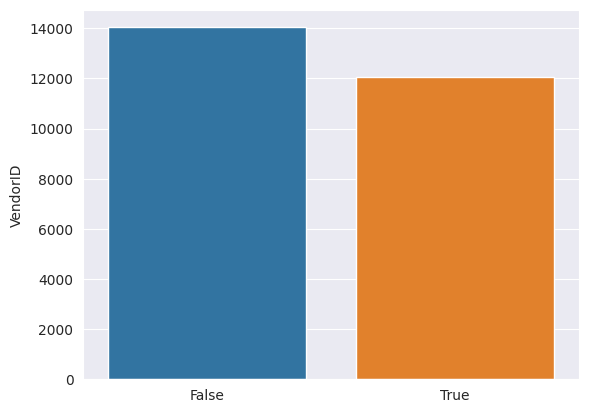

In [126]:
vendorid_counts = df_data.VendorID.value_counts()
sb.barplot(x=vendorid_counts.index, y=vendorid_counts, estimator=max)

In [127]:
df_data.VendorID.corr(df_data.GoodTip)

0.006456726029941185

<AxesSubplot:ylabel='VendorID'>

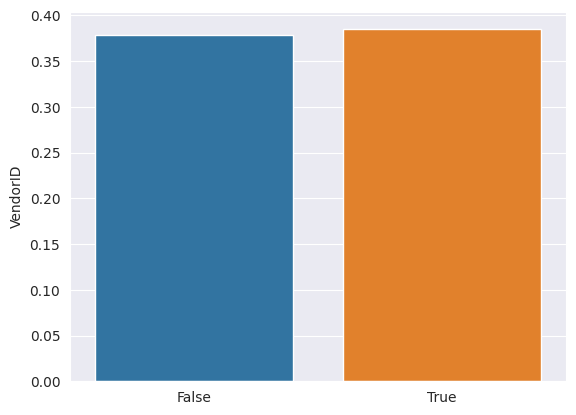

In [128]:
vendorid_goodtip_counts = df_data.VendorID[df_data.GoodTip].value_counts()
vendorid_ratio = vendorid_goodtip_counts / vendorid_counts
sb.barplot(x=vendorid_ratio.index, y=vendorid_ratio, estimator=max)

From the plots above we can see that `VendorID` doesn't correlate with `GoodTip` column. Maybe it matter when it's combined with another column but for now it looks like an unnecessary column.

<AxesSubplot:ylabel='passenger_count'>

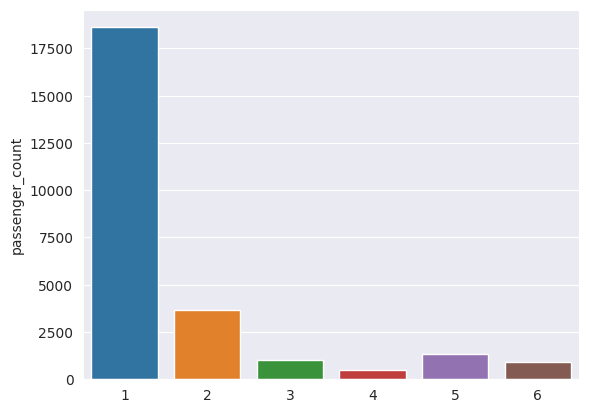

In [129]:
passengers_counts = df_data.passenger_count.value_counts()
sb.barplot(x=passengers_counts.index, y=passengers_counts, estimator=max)

In [130]:
df_data.passenger_count.corr(df_data.GoodTip)

0.0009933113919558074

<AxesSubplot:ylabel='passenger_count'>

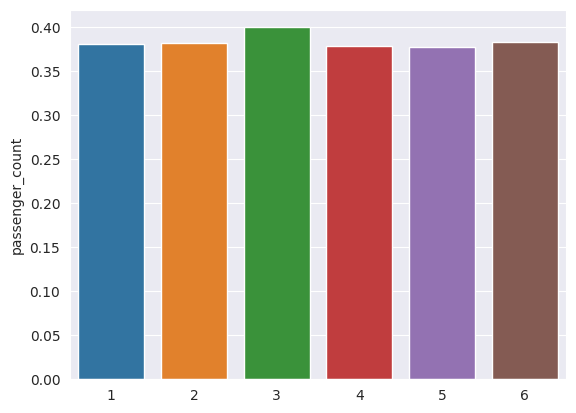

In [131]:
passengers_goodtip_counts = df_data.passenger_count[df_data.GoodTip].value_counts()
passengers_ratio = passengers_goodtip_counts / passengers_counts
sb.barplot(x=passengers_ratio.index, y=passengers_ratio, estimator=max)

`passenger_count` column looks unusefull too. Sometimes 3 passengers leave more good tips but it can be a statistical error.

<AxesSubplot:ylabel='trip_distance'>

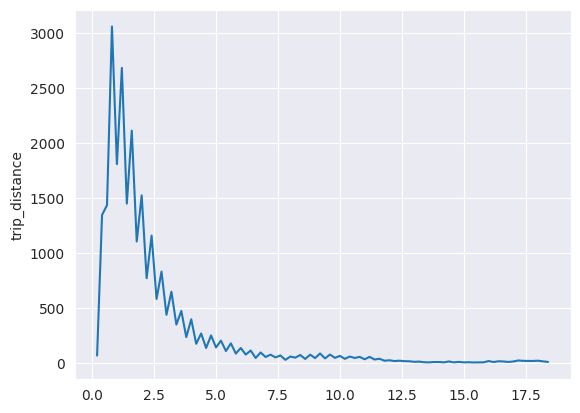

In [132]:
def round_distance(distance, factor=5):
    return round(distance * factor) / factor

trip_distance_counts = round_distance(df_data.trip_distance).value_counts()
sb.lineplot(x=trip_distance_counts.index, y=trip_distance_counts, estimator=max)

In [133]:
df_data.trip_distance.corr(df_data.GoodTip)

0.32834622723589674

<AxesSubplot:ylabel='trip_distance'>

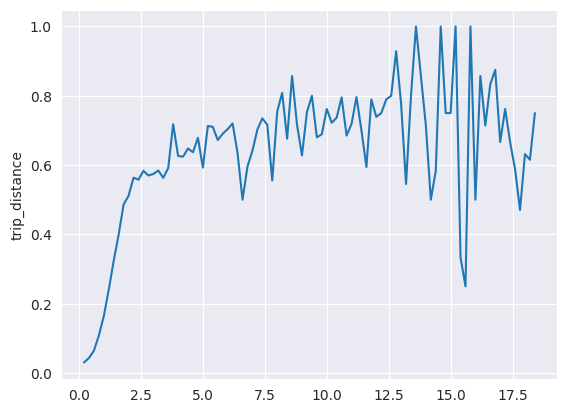

In [134]:
trip_distance_goodtip_counts = round_distance(df_data.trip_distance[df_data.GoodTip]).value_counts()
trip_distance_ratio = trip_distance_goodtip_counts / trip_distance_counts
sb.lineplot(x=trip_distance_ratio.index, y=trip_distance_ratio)

From the exploration above we can see the for short trips there usually there are no tips while for long trips the data has high variance because of low amount of long trips. But still it can be usefull to estimate the `GoodTip` column

<AxesSubplot:ylabel='RatecodeID'>

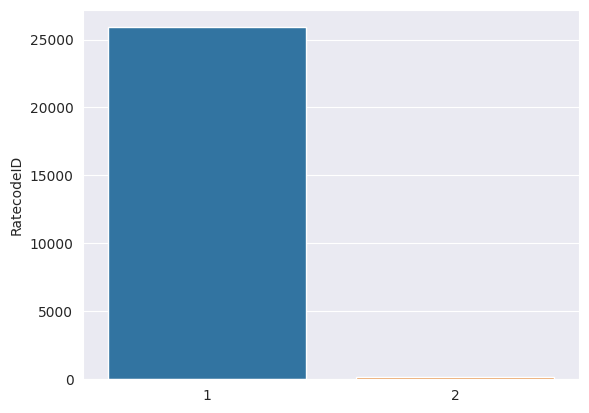

In [135]:
ratecode_counts = df_data.RatecodeID.value_counts()
sb.barplot(x=ratecode_counts.index, y=ratecode_counts, estimator=max)

In [136]:
df_data.RatecodeID.corr(df_data.GoodTip)

0.04794776835481012

<AxesSubplot:ylabel='RatecodeID'>

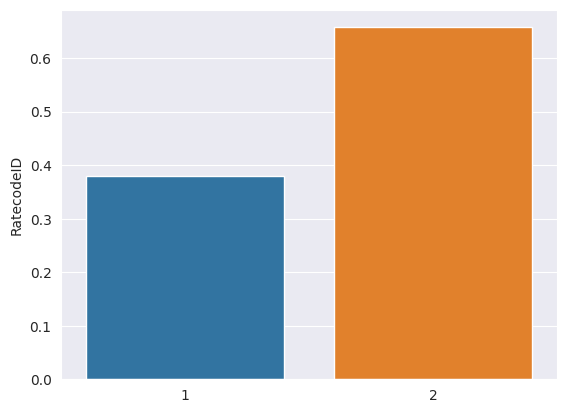

In [137]:
ratecode_goodtip_counts = df_data.RatecodeID[df_data.GoodTip].value_counts()
ratecode_ratio = ratecode_goodtip_counts / ratecode_counts
sb.barplot(x=ratecode_ratio.index, y=ratecode_ratio, estimator=max)

Despite the fact that almost always the `RatecodeID` is the same it still can be used to predict `GoodTip`.

<AxesSubplot:ylabel='store_and_fwd_flag'>

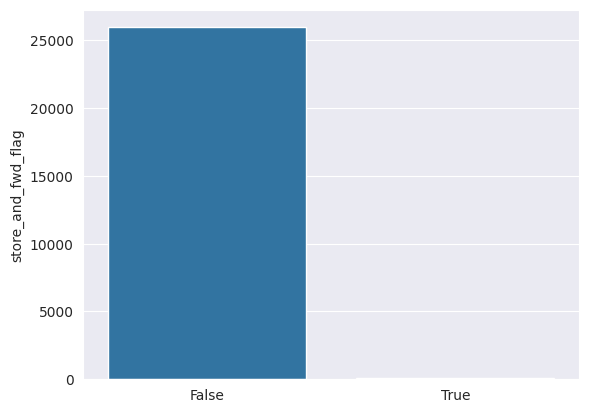

In [138]:
store_and_fwd_flag_counts = df_data.store_and_fwd_flag.value_counts()
sb.barplot(x=store_and_fwd_flag_counts.index, y=store_and_fwd_flag_counts, estimator=max)

In [139]:
df_data.store_and_fwd_flag.corr(df_data.GoodTip)

0.00197143316190515

<AxesSubplot:ylabel='store_and_fwd_flag'>

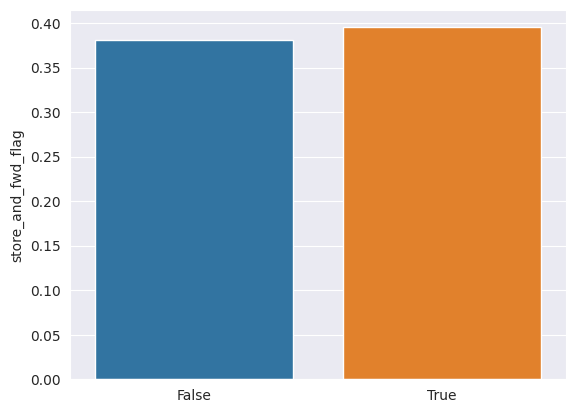

In [140]:
store_and_fwd_flag_goodtip_counts = df_data.store_and_fwd_flag[df_data.GoodTip].value_counts()
store_and_fwd_flag_ratio = store_and_fwd_flag_goodtip_counts / store_and_fwd_flag_counts
sb.barplot(x=store_and_fwd_flag_ratio.index, y=store_and_fwd_flag_ratio, estimator=max)

Here we can see that `store_and_fwd_flag_ratio` column alone is useless for prediction of `GoodTip`

<AxesSubplot:ylabel='payment_type'>

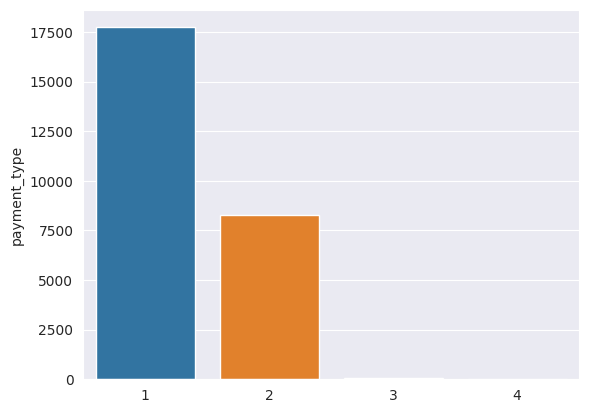

In [141]:
payment_type_counts = df_data.payment_type.value_counts()
sb.barplot(x=payment_type_counts.index, y=payment_type_counts, estimator=max)

In [142]:
df_data.payment_type.corr(df_data.GoodTip)

-0.5307766629858311

<AxesSubplot:ylabel='payment_type'>

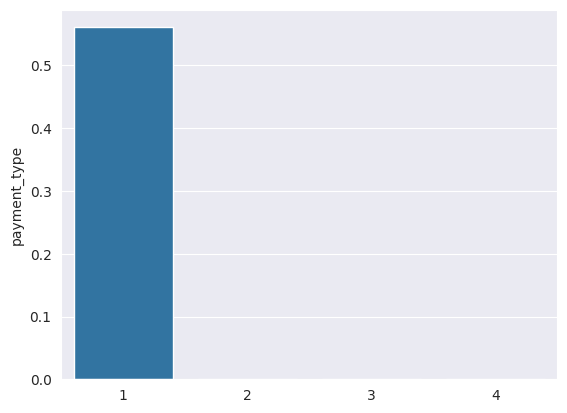

In [143]:
payment_type_goodtip_counts = df_data.payment_type[df_data.GoodTip].value_counts()
payment_type_ratio = (payment_type_goodtip_counts / payment_type_counts).fillna(0)
sb.barplot(x=payment_type_ratio.index, y=payment_type_ratio, estimator=max)

In [144]:
payment_type_ratio

1    0.560812
2    0.000000
3    0.000000
4    0.000000
Name: payment_type, dtype: float64

From here we can see the only with credit card payments the tips are good. It makes sense to create a column `credit_card`.

<AxesSubplot:ylabel='fare_amount'>

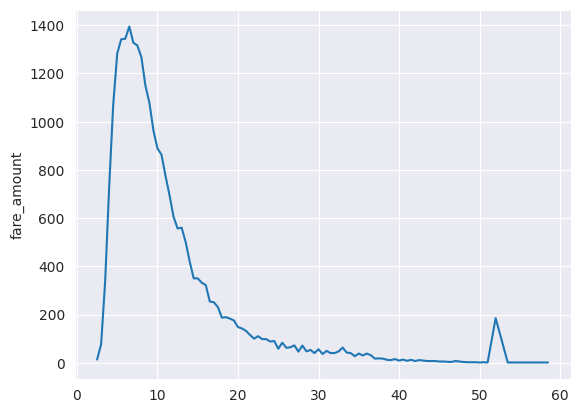

In [145]:
fare_amount_counts = df_data.fare_amount.value_counts()
sb.lineplot(x=fare_amount_counts.index, y=fare_amount_counts, estimator=max)

In [146]:
df_data.fare_amount.corr(df_data.GoodTip)

0.36859382060435447

<AxesSubplot:ylabel='fare_amount'>

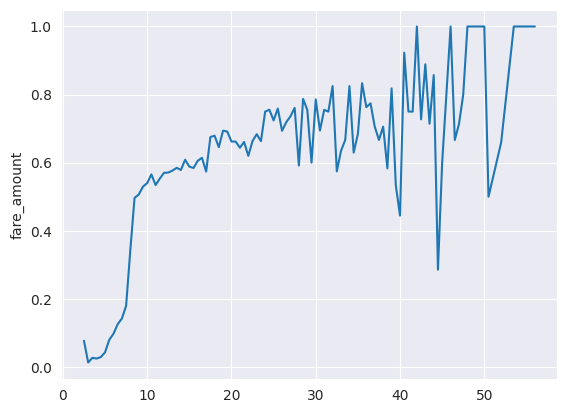

In [147]:
fare_amount_goodtip_counts = df_data.fare_amount[df_data.GoodTip].value_counts()
fare_amount_ratio = fare_amount_goodtip_counts / fare_amount_counts
sb.lineplot(x=fare_amount_ratio.index, y=fare_amount_ratio, estimator=max)

`fare_amount` columns can be used to predict `GoodTip` value. With low fare (below 10 dollars) tips are usually bad. But there is a 50-80% probability that tips are good if fare amount between 10-30 dollars. Then it's not enough data to predict the good tip.

<AxesSubplot:ylabel='extra'>

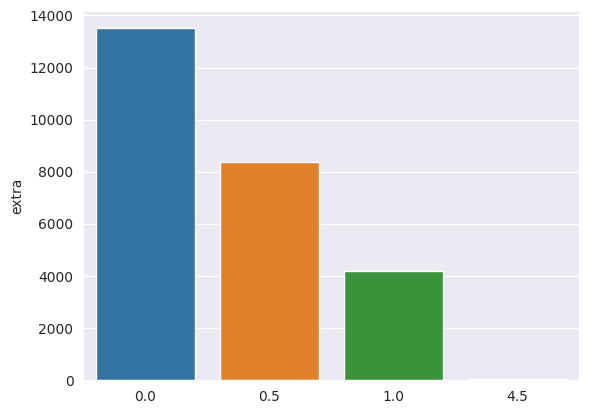

In [148]:
extra_counts = df_data.extra.value_counts()
sb.barplot(x=extra_counts.index, y=extra_counts, estimator=max)

In [149]:
df_data.extra.corr(df_data.GoodTip)

0.0676267033232145

<AxesSubplot:ylabel='extra'>

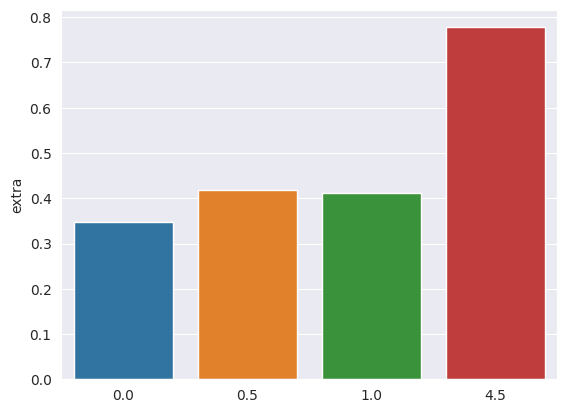

In [150]:
extra_goodtip_counts = df_data.extra[df_data.GoodTip].value_counts()
extra_ratio = extra_goodtip_counts / extra_counts
sb.barplot(x=extra_ratio.index, y=extra_ratio, estimator=max)

The larger value of `extra` column the larger probability to receive a good tip.

<AxesSubplot:ylabel='tip_amount'>

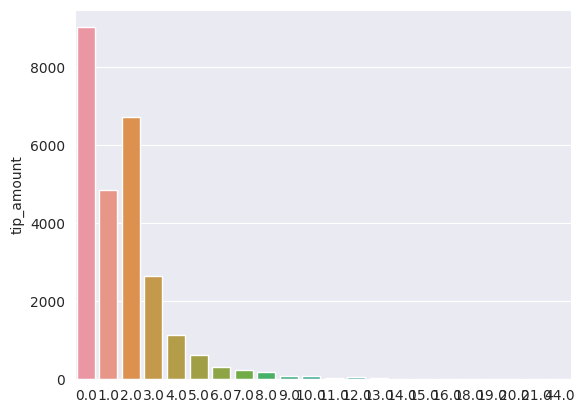

In [151]:
def round_tip(tip, factor=1):
    return round(tip * factor) / factor

tip_amount_counts = round_tip(df_data.tip_amount).value_counts()
sb.barplot(x=tip_amount_counts.index, y=tip_amount_counts, estimator=max)

In [152]:
df_data.tip_amount.corr(df_data.GoodTip)

0.7062992375954432

<AxesSubplot:ylabel='tip_amount'>

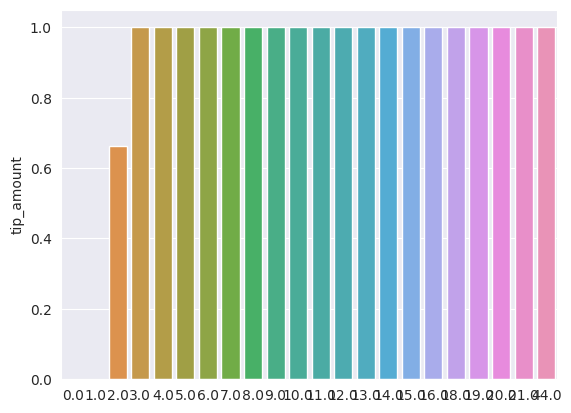

In [153]:
tip_amount_goodtip_counts = round_tip(df_data.tip_amount[df_data.GoodTip]).value_counts()
tip_amount_ratio = tip_amount_goodtip_counts / tip_amount_counts
sb.barplot(x=tip_amount_ratio.index, y=tip_amount_ratio, estimator=max)

In [154]:
threshold = 1.78
low = df_data[df_data.tip_amount < threshold].GoodTip.value_counts()
high = df_data[df_data.tip_amount >= threshold].GoodTip.value_counts()

low[False] + high[True] == df_data.shape[0]

True

It means that all tips below 1.78 are considered bad and above 1.78 are considered good. It allows to predict the `GoodTip` column based on `tip_amount` column extremely precisely.

<AxesSubplot:ylabel='tolls_amount'>

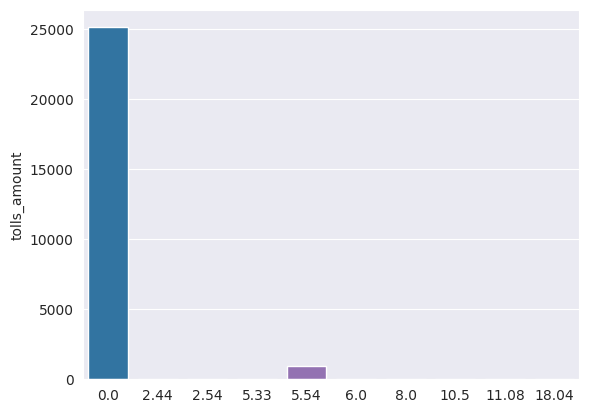

In [155]:
toll_amount_counts = df_data.tolls_amount.value_counts()
sb.barplot(x=toll_amount_counts.index, y=toll_amount_counts, estimator=max)

In [156]:
df_data.tolls_amount.corr(df_data.GoodTip)

0.15333832297013983

<AxesSubplot:ylabel='tolls_amount'>

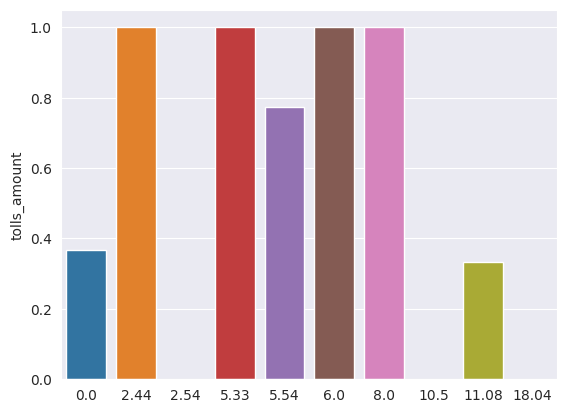

In [157]:
toll_amount_goodtoll_counts = df_data.tolls_amount[df_data.GoodTip].value_counts()
toll_amount_ratio = toll_amount_goodtoll_counts / toll_amount_counts
sb.barplot(x=toll_amount_ratio.index, y=toll_amount_ratio, estimator=max)

Looks like for a nonzero tolls amount the probability of good tips is higher.

<AxesSubplot:ylabel='total_amount'>

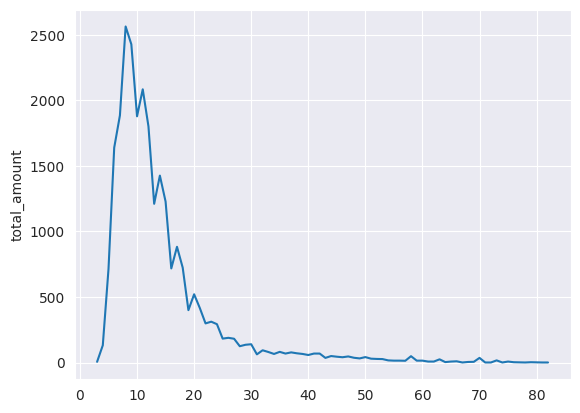

In [158]:
total_amount_counts = round(df_data.total_amount).value_counts()
sb.lineplot(x=total_amount_counts.index, y=total_amount_counts, estimator=max)

In [159]:
df_data.total_amount.corr(df_data.GoodTip)

0.4546754974205631

<AxesSubplot:ylabel='total_amount'>

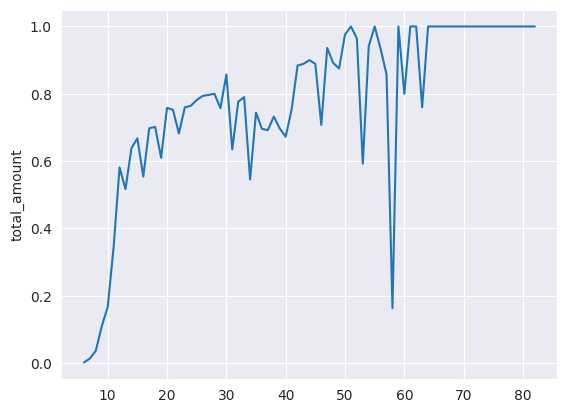

In [160]:
total_amount_goodtotal_counts = round(df_data.total_amount[df_data.GoodTip]).value_counts()
total_amount_ratio = total_amount_goodtotal_counts / total_amount_counts
sb.lineplot(x=total_amount_ratio.index, y=total_amount_ratio, estimator=max)

The larger total trip price the larger chance to receive good tips

<AxesSubplot:ylabel='Extra'>

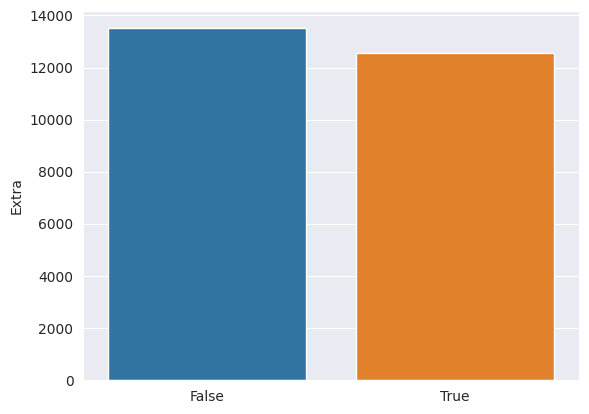

In [161]:
Extra_counts = df_data.Extra.value_counts()
sb.barplot(x=Extra_counts.index, y=Extra_counts, estimator=max)

In [162]:
df_data.Extra.corr(df_data.GoodTip)

0.07097425451034019

<AxesSubplot:ylabel='Extra'>

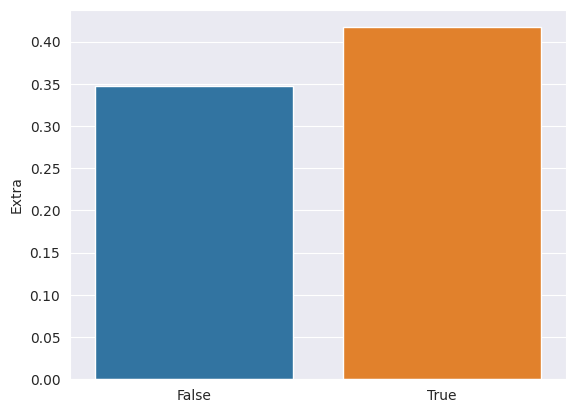

In [163]:
Extra_goodtip_counts = df_data.Extra[df_data.GoodTip].value_counts()
Extra_ratio = Extra_goodtip_counts / Extra_counts
sb.barplot(x=Extra_ratio.index, y=Extra_ratio, estimator=max)

There is a minor correlation which can be a statistical error.

<AxesSubplot:ylabel='Cash'>

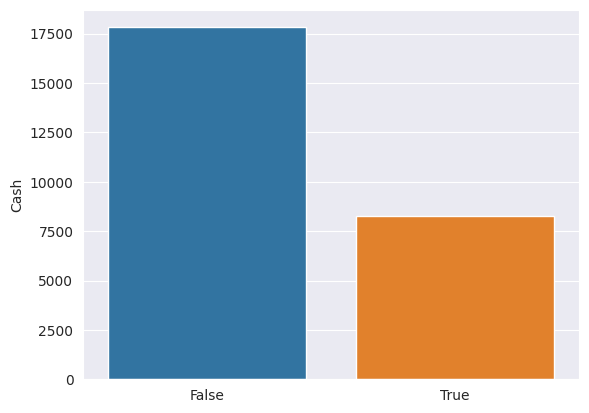

In [164]:
Cash_counts = df_data.Cash.value_counts()
sb.barplot(x=Cash_counts.index, y=Cash_counts, estimator=max)

In [165]:
df_data.Cash.corr(df_data.GoodTip)

-0.5344250527712204

<AxesSubplot:ylabel='Cash'>

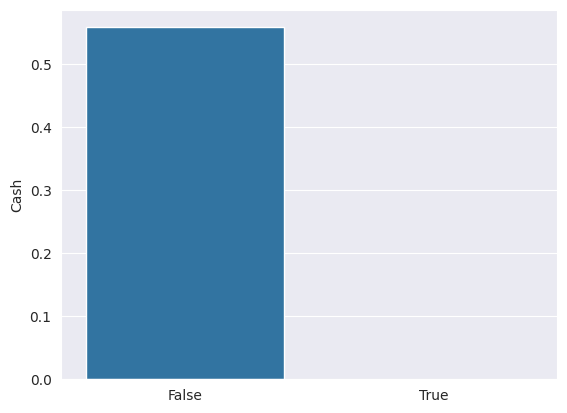

In [166]:
Cash_goodtip_counts = df_data.Cash[df_data.GoodTip].value_counts()
Cash_ratio = Cash_goodtip_counts / Cash_counts
sb.barplot(x=Cash_ratio.index, y=Cash_ratio, estimator=max)

Paying with cash leads to no good tips. This confirms the previous finding which states that "only credit card payment type leads to good tips".

<AxesSubplot:ylabel='pickup_weekday'>

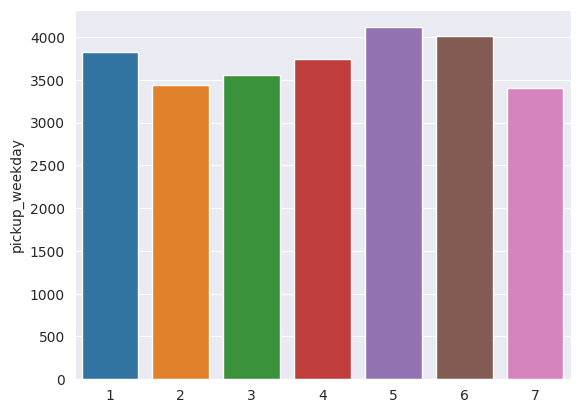

In [167]:
pickup_weekday_numerated = df_data.pickup_weekday.replace({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7})
pickup_weekday_counts = pickup_weekday_numerated.value_counts()
sb.barplot(x=pickup_weekday_counts.index, y=pickup_weekday_counts, estimator=max)

In [168]:
pickup_weekday_numerated.corr(df_data.GoodTip)

-0.0199310983069438

<AxesSubplot:ylabel='pickup_weekday'>

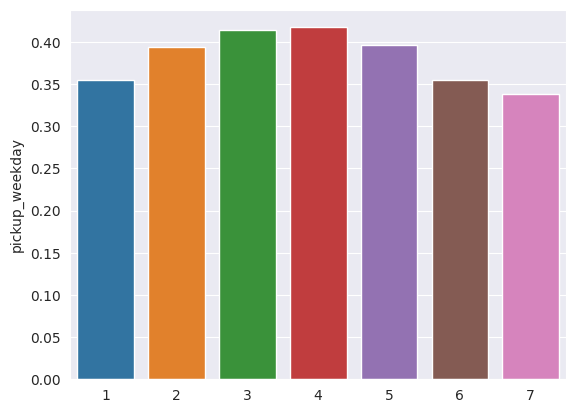

In [169]:
pickup_weekday_goodtip_counts = df_data.pickup_weekday[df_data.GoodTip].replace({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7}).value_counts()
pickup_weekday_ratio = pickup_weekday_goodtip_counts / pickup_weekday_counts
sb.barplot(x=pickup_weekday_ratio.index, y=pickup_weekday_ratio, estimator=max)

There is higher probability to get good tips in the middle of the week but it could be a statistical error.

<AxesSubplot:ylabel='pickup_hour'>

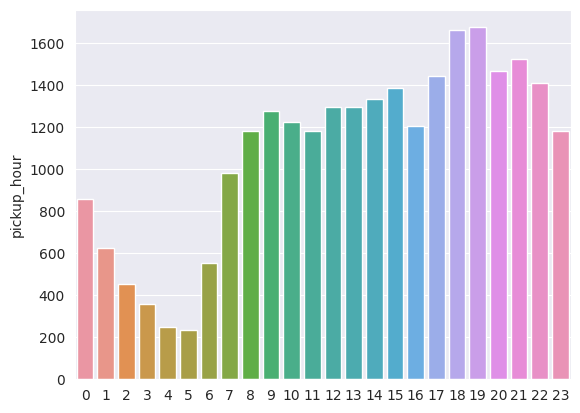

In [170]:
pickup_hour_counts = df_data.pickup_hour.value_counts()
sb.barplot(x=pickup_hour_counts.index, y=pickup_hour_counts, estimator=max)

In [171]:
df_data.pickup_hour.corr(df_data.GoodTip)

0.04223491557172198

<AxesSubplot:ylabel='pickup_hour'>

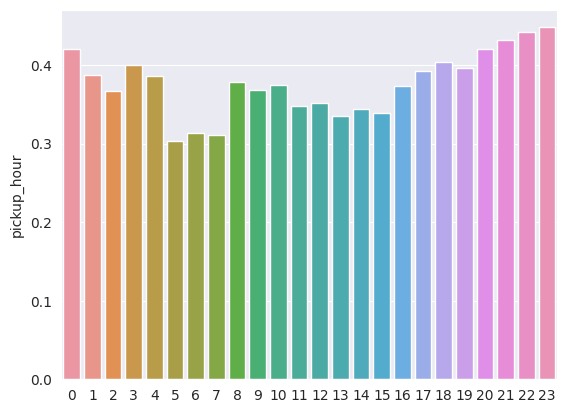

In [172]:
pickup_hour_goodtip_counts = df_data.pickup_hour[df_data.GoodTip].value_counts()
pickup_hour_ratio = pickup_hour_goodtip_counts / pickup_hour_counts
sb.barplot(x=pickup_hour_ratio.index, y=pickup_hour_ratio, estimator=max)

There is higher chance to get good tips in a night and lower in the morning.

<AxesSubplot:>

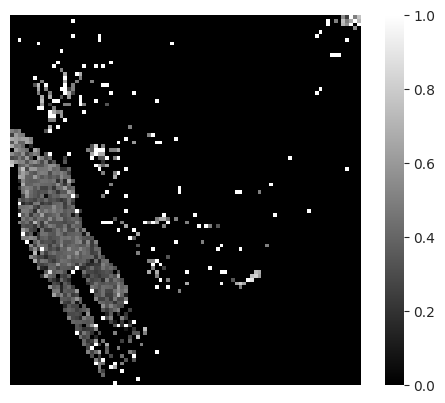

In [173]:
pickup_regions_goodtip = df_data[df_data.GoodTip].groupby(['pickup_x', 'pickup_y']).size().unstack().fillna(0)
pickup_regions_all = pickup_regions.groupby(['X', 'Y']).size().unstack().fillna(0)
pickup_regions_ratio = (pickup_regions_goodtip/pickup_regions_all).fillna(0)
sb.heatmap(pickup_regions_ratio, xticklabels=False, yticklabels=False, cmap="gray", square=True, cbar=True)

<AxesSubplot:ylabel='dropoff_x'>

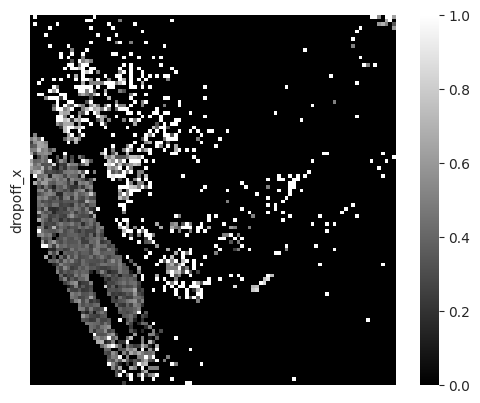

In [174]:
dropoff_regions_goodtip = df_data[df_data.GoodTip].groupby(['dropoff_x', 'dropoff_y']).size().unstack().fillna(0)
dropoff_regions_all = dropoff_regions.groupby(['X', 'Y']).size().unstack().fillna(0)
dropoff_regions_ratio = (dropoff_regions_goodtip/dropoff_regions_all).fillna(0)
sb.heatmap(dropoff_regions_ratio, xticklabels=False, yticklabels=False, cmap="gray", square=True, cbar=True)

There are some special places on the map where pick up or drop off correlates with higher chance of a good tip.

By this moment the data exploration is over and let's create a model to predictive the target variable `GoodTip`.

# Model creation

Let's start with exploring that data set again and compose the list of features which are going to be used in training of the model.

In [175]:
df_data.describe(include='all')

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,GoodTip,Extra,Cash,pickup_weekday,pickup_hour,pickup_x,pickup_y,dropoff_x,dropoff_y
count,26084,26084.000000,26084.000000,26084.000000,26084,26084.000000,26084.000000,26084.000000,26084.000000,26084.000000,26084.000000,26084,26084,26084,26084,26084.000000,26084.000000,26084.000000,26084.000000,26084.000000
unique,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,7,NaN,NaN,NaN,NaN,NaN
top,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,fri,NaN,NaN,NaN,NaN,NaN
freq,14038,NaN,NaN,NaN,25960,NaN,NaN,NaN,NaN,NaN,NaN,16138,13507,17824,4113,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.658296,2.453902,1.007054,NaN,1.324605,11.211221,0.326771,1.633761,0.201673,14.173427,NaN,NaN,NaN,NaN,13.746013,61.368080,16.147370,61.074950,16.586451
std,NaN,1.317942,2.567947,0.083694,NaN,0.480122,7.650964,0.402019,1.924148,1.046221,9.604070,NaN,NaN,NaN,NaN,6.255522,13.177269,12.305052,14.802873,11.549533
min,NaN,1.000000,0.210000,1.000000,NaN,1.000000,2.500000,0.000000,0.000000,0.000000,3.300000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,1.000000,1.000000,NaN,1.000000,6.500000,0.000000,0.000000,0.000000,8.300000,NaN,NaN,NaN,NaN,9.000000,54.000000,10.000000,53.000000,10.000000
50%,NaN,1.000000,1.600000,1.000000,NaN,1.000000,9.000000,0.000000,1.350000,0.000000,11.300000,NaN,NaN,NaN,NaN,14.000000,62.000000,14.000000,62.000000,14.000000
75%,NaN,2.000000,2.800000,1.000000,NaN,2.000000,13.000000,0.500000,2.260000,0.000000,16.300000,NaN,NaN,NaN,NaN,19.000000,70.000000,19.000000,71.000000,21.000000


From the data exploration stage we can make following conclusions:

1. `VendorID` column is not such informative as other and can be removed.
2. `RatecodeID` can be converted to boolean.
3. `store_and_fwd_flag_ratio` is quite useless and can be removed.
4. `payment_type` can be replaced with `credit_card` column.
5. `tolls_amount` should be replaced with a boolean value which indicates whether the amount is zero.
6. `Extra` column is meaningless and can be dropped.
7. `Cash` column is probably will become useless when `credit_card` column will be added. This hypothesis should be checked and probably this column should be deleted.
8. `pickup_weekday` should be converted back to integer value.

Let's start with checking the hypothesis about `Cash` column

In [176]:
df_data[df_data.payment_type == 2].Cash.value_counts()[True] == df_data[df_data.Cash].shape[0]

True

The hypothesis has confirmed. As long as the payment type is credit card it can't be cash. The `Cash` column can be omitted because `creadit_card` column makes more sense for the model.

In [177]:
df_features = df_data

df_features['RatecodeID'] = df_features.RatecodeID.replace({1.0:True, 2.0:False})
df_features['credit_card'] = df_features.payment_type.replace({1:True, 2:False, 3:False, 4:False})
df_features['tolls_amount'] = df_features.tolls_amount.map(lambda x : x == 0.0)
df_features['weekday'] = pickup_weekday_numerated
df_features['hour'] = df_data.pickup_hour

df_features = df_features.drop(['VendorID', 'store_and_fwd_flag', 'Extra', 'Cash', 'payment_type', 'pickup_weekday', 'pickup_hour'], axis=1)
df_features.describe(include='all')

,passenger_count,trip_distance,RatecodeID,fare_amount,extra,tip_amount,tolls_amount,total_amount,GoodTip,pickup_x,pickup_y,dropoff_x,dropoff_y,credit_card,weekday,hour
count,26084.000000,26084.000000,26084,26084.000000,26084.000000,26084.000000,26084,26084.000000,26084,26084.000000,26084.000000,26084.000000,26084.000000,26084,26084.000000,26084.000000
unique,NaN,NaN,2,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,True,NaN,NaN,NaN,True,NaN,False,NaN,NaN,NaN,NaN,True,NaN,NaN
freq,NaN,NaN,25900,NaN,NaN,NaN,25140,NaN,16138,NaN,NaN,NaN,NaN,17735,NaN,NaN
mean,1.658296,2.453902,NaN,11.211221,0.326771,1.633761,NaN,14.173427,NaN,61.368080,16.147370,61.074950,16.586451,NaN,4.016140,13.746013
std,1.317942,2.567947,NaN,7.650964,0.402019,1.924148,NaN,9.604070,NaN,13.177269,12.305052,14.802873,11.549533,NaN,1.982249,6.255522
min,1.000000,0.210000,NaN,2.500000,0.000000,0.000000,NaN,3.300000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,1.000000,1.000000,NaN,6.500000,0.000000,0.000000,NaN,8.300000,NaN,54.000000,10.000000,53.000000,10.000000,NaN,2.000000,9.000000
50%,1.000000,1.600000,NaN,9.000000,0.000000,1.350000,NaN,11.300000,NaN,62.000000,14.000000,62.000000,14.000000,NaN,4.000000,14.000000
75%,2.000000,2.800000,NaN,13.000000,0.500000,2.260000,NaN,16.300000,NaN,70.000000,19.000000,71.000000,21.000000,NaN,6.000000,19.000000


In [178]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26084 entries, 1 to 28454
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  26084 non-null  int64  
 1   trip_distance    26084 non-null  float64
 2   RatecodeID       26084 non-null  bool   
 3   fare_amount      26084 non-null  float64
 4   extra            26084 non-null  float64
 5   tip_amount       26084 non-null  float64
 6   tolls_amount     26084 non-null  bool   
 7   total_amount     26084 non-null  float64
 8   GoodTip          26084 non-null  bool   
 9   pickup_x         26084 non-null  int64  
 10  pickup_y         26084 non-null  int64  
 11  dropoff_x        26084 non-null  int64  
 12  dropoff_y        26084 non-null  int64  
 13  credit_card      26084 non-null  bool   
 14  weekday          26084 non-null  int64  
 15  hour             26084 non-null  int64  
dtypes: bool(4), float64(5), int64(7)
memory usage: 2.7 MB


The dataset contains 3 boolean features (without `GoodTip`). We can replace it with one integer in order to reduce the total number of features.

In [179]:
df_features['bool_feature'] = df_features.RatecodeID * 4 + df_features.tolls_amount * 2 + df_features.credit_card

df_features = df_features.drop(['RatecodeID', 'tolls_amount', 'credit_card'], axis=1)

df_features.describe(include='all')

,passenger_count,trip_distance,fare_amount,extra,tip_amount,total_amount,GoodTip,pickup_x,pickup_y,dropoff_x,dropoff_y,weekday,hour,bool_feature
count,26084.000000,26084.000000,26084.000000,26084.000000,26084.000000,26084.000000,26084,26084.000000,26084.000000,26084.000000,26084.000000,26084.000000,26084.000000,26084.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,16138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.658296,2.453902,11.211221,0.326771,1.633761,14.173427,NaN,61.368080,16.147370,61.074950,16.586451,4.016140,13.746013,6.579321
std,1.317942,2.567947,7.650964,0.402019,1.924148,9.604070,NaN,13.177269,12.305052,14.802873,11.549533,1.982249,6.255522,0.729718
min,1.000000,0.210000,2.500000,0.000000,0.000000,3.300000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000,8.300000,NaN,54.000000,10.000000,53.000000,10.000000,2.000000,9.000000,6.000000
50%,1.000000,1.600000,9.000000,0.000000,1.350000,11.300000,NaN,62.000000,14.000000,62.000000,14.000000,4.000000,14.000000,7.000000
75%,2.000000,2.800000,13.000000,0.500000,2.260000,16.300000,NaN,70.000000,19.000000,71.000000,21.000000,6.000000,19.000000,7.000000


In [180]:
df_good_tip = df_features.GoodTip
df_features = df_features.drop('GoodTip', axis=1)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26084 entries, 1 to 28454
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  26084 non-null  int64  
 1   trip_distance    26084 non-null  float64
 2   fare_amount      26084 non-null  float64
 3   extra            26084 non-null  float64
 4   tip_amount       26084 non-null  float64
 5   total_amount     26084 non-null  float64
 6   pickup_x         26084 non-null  int64  
 7   pickup_y         26084 non-null  int64  
 8   dropoff_x        26084 non-null  int64  
 9   dropoff_y        26084 non-null  int64  
 10  weekday          26084 non-null  int64  
 11  hour             26084 non-null  int64  
 12  bool_feature     26084 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 2.8 MB


Now when features are ready let's create a baseline model. Let it be a simple liner model.

In [181]:
from sklearn.model_selection import train_test_split

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_features,
    df_good_tip,
    test_size=0.25
)

print(f'df_train_x size: {df_train_x.shape}')
print(f'df_test_x size: {df_test_x.shape}')
print(f'df_train_y size: {df_train_y.shape}')
print(f'df_test_y size: {df_test_y.shape}')

df_train_x size: (19563, 13)
df_test_x size: (6521, 13)
df_train_y size: (19563,)
df_test_y size: (6521,)


In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import cohen_kappa_score, accuracy_score
import numpy as np

base_model = LinearRegression()

base_model.fit(df_train_x, df_train_y)
y_pred = np.round(np.clip(base_model.predict(df_test_x), 0, 1)).astype(bool)

print(f'Kappa: {cohen_kappa_score(df_test_y, y_pred):.2f}')
print(f'Accuracy: {accuracy_score(df_test_y, y_pred):.2f}')

Kappa: 0.85
Accuracy: 0.93


For measuring the quality of models we are going to use 2 metrics: accuracy score and Cohen’s kappa score. The target variable is boolean variable in almost balanced dataset therefore the is no need to use any complex metrics. But there is a problem that even the model which predicts results randomly may get about 50% accuracy. In order to overcome this problem there is a Cohen’s kappa score which is 0 for such a random model, 1 for 100% accurate results and -1 for 100% opposite results. This score perfectly fits our needs.

Now let's create a more smart model. Let's start with a random forest because this model is fast trainable and can show feature importance.

In [183]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(max_depth=2, n_estimators=8, random_state=3)

forest_model.fit(df_train_x, df_train_y)
y_pred = np.round(np.clip(forest_model.predict(df_test_x), 0, 1)).astype(bool)

print(f'Kappa: {cohen_kappa_score(df_test_y, y_pred):.2f}')
print(f'Accuracy: {accuracy_score(df_test_y, y_pred):.2f}')

Kappa: 0.93
Accuracy: 0.97


The score of this model is approximately the same but now we can see feature importance. Let's view it

In [184]:
importance = forest_model.feature_importances_ / np.linalg.norm(forest_model.feature_importances_)
np.column_stack((df_features.columns.values, importance))

array([['passenger_count', 0.0],
       ['trip_distance', 0.06110675228725932],
       ['fare_amount', 0.3898421788713802],
       ['extra', 0.0],
       ['tip_amount', 0.7820375392010562],
       ['total_amount', 0.36337663727897196],
       ['pickup_x', 0.0],
       ['pickup_y', 0.21138926758455073],
       ['dropoff_x', 0.0],
       ['dropoff_y', 0.0],
       ['weekday', 0.0],
       ['hour', 0.0],
       ['bool_feature', 0.23659738947834652]], dtype=object)

From the feature importance list we can see that the most important features are `tip_amount`, `fare_amount`, `total_amount` and `bool_feature`. We can assume the `total_amount` and `tip_amount` are highly correlated features. From the data exploration stage we know that `tip_amount` is enough to predict good tip and this model proofs it.

Now let's calculate correlation of `tip_amount`, `fare_amount`, and `total_amount` in order to confirm the hypothesis that other prices can e omitted and only `tip_amount` can be left.

In [185]:
df_features.total_amount.corr(df_features.tip_amount)

0.7222704532826693

In [186]:
df_features.fare_amount.corr(df_features.tip_amount)

0.5903478824190802

In [187]:
df_features.total_amount.corr(df_features.fare_amount)

0.9790407564452801

These features are highly correlated. Let's keep only `tip_amount` feature and create a model to predict good tip.

Kappa: 1.00
Accuracy: 1.00


<AxesSubplot:xlabel='tip_amount'>

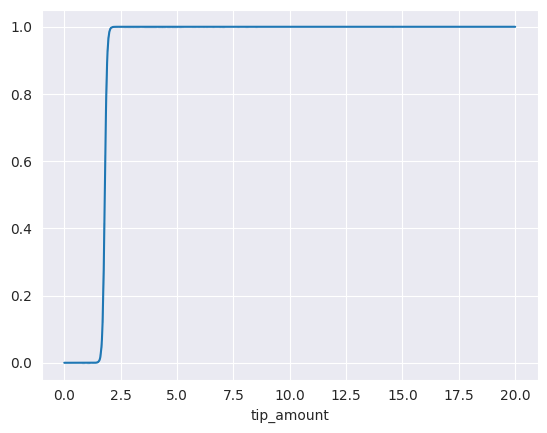

In [188]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=0)

logistic_model.fit(pd.DataFrame(df_train_x.tip_amount), df_train_y)

df_tip_amount = pd.DataFrame(df_test_x.tip_amount)
y_pred_prob = logistic_model.predict_proba(df_tip_amount)[:,1]
y_pred = logistic_model.predict(df_tip_amount)

print(f'Kappa: {cohen_kappa_score(df_test_y, y_pred):.2f}')
print(f'Accuracy: {accuracy_score(df_test_y, y_pred):.2f}')


sb.lineplot(x=df_test_x.tip_amount, y=y_pred_prob)

In [189]:
print(logistic_model.coef_)
print(logistic_model.intercept_)

[[20.58589687]]
[-36.98503111]


The model is 100% accurate and produces the following equation:

`p = 1/(1+exp(-(x*c+i)))` where `c=20.58589687`, `i = -36.98503111`, and x is `tip_amount` of the sample.
if `p > 0.5` then `GoodTip` is `True` else `False`.

`p > 0.5` when `x > 1.80227`.

This solver the initial task of this project.

# Conclusion

In this report we:
 1. Visualized and statistically analysed all features of the dataset.
 2. Discovered and cleaned incorrect rows.
 3. Transformed the dataset in a more conformable for processing format.
 4. Found the most important features which allow to predict the target variable.
 5. And finally created a model which can do it 100% accurately.

The goal of the exam is achieved.